In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("CTG_Stock_Data.csv")
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

In [3]:
# Split the data into training and testing sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size 
train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [4]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 4. Quá trình testing \n",
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [6]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo\n",
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21191.37440919 21195.70417509 21200.03394098 21204.36370688
 21208.69347277 21213.02323867 21217.35300457 21221.68277046
 21226.01253636 21230.34230226 21234.67206815 21239.00183405
 21243.33159995 21247.66136584 21251.99113174 21256.32089763
 21260.65066353 21264.98042943 21269.31019532 21273.63996122
 21277.96972712 21282.29949301 21286.62925891 21290.95902481
 21295.2887907  21299.6185566  21303.94832249 21308.27808839
 21312.60785429 21316.93762018]


In [7]:
# 6. Đánh giá độ chính xác test
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
#MSLE
test_msle = np.mean((np.log1p(y_test) - np.log1p(y_pred))**2)
print('Testing MSLE:', test_msle)
# Mean Absolute Percentage Error (MAPE)
test_mape = 100 * np.mean(np.abs((y_test - y_pred) / y_test))
print('Testing MAPE:', test_mape)

Testing RMSE: 8362.101811607334
Testing MSLE: 0.1212117569302328
Testing MAPE: 26.353888090363515


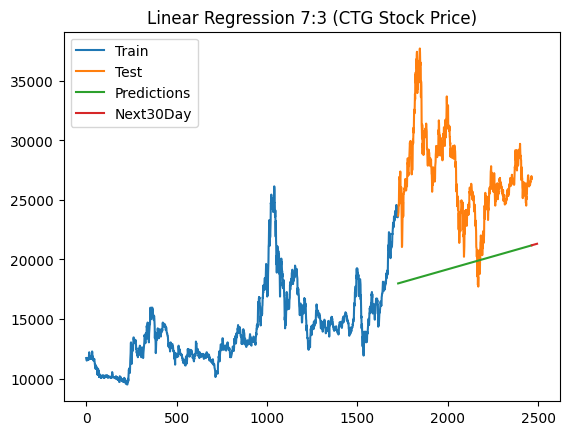

In [8]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('Linear Regression 7:3 (CTG Stock Price)')
plt.show()